# Phase1
1.	Dataset data exploration: List the main finding of the dataset. Be thorough and creative. For example, look at:

    a.	Counts, averages
    b.	Distribution of the number of reviews across products
    c.	Distribution of the number of reviews per product
    d.	Distribution of reviews per user
    e.	Review lengths and outliers
    f.	Analyze lengths
    g.	Check for duplicates

2.	Text basic pre-processing: 

    a.	Label your data based on the value of “rating of the product” i.e. as follows:

        i.	 Ratings 4,5:  Positive 
        ii.	 Rating    3:  Neutral
        iii. Ratings 1,2:  Negative

    b.	Chose the appropriate columns for your sentiment analyzer. (Give this some thought) and mention in your report why you chose each column.

    c.	Check for outliers


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the json file (complete data format)
file_path_json = './data/Gift_Cards_5.json'
data_json = pd.read_json(file_path_json, lines=True)

# Load only review score
# file_path_csv = './data/Gift_Cards.csv'
# data_csv = pd.read_csv(file_path_csv, names=['asin', 'reviewerID', 'overall', 'unixReviewTime'])
data_json.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"06 17, 2018",A31UBHTUUIFJUT,B004LLIKVU,{'Gift Amount:': ' 50'},john stoiber,Another great gift.,Five Stars,1529193600,NaN,NaN
1,4,True,"06 14, 2018",A2MN5JQMIY0FQ2,B004LLIKVU,{'Gift Amount:': ' 50'},Amazon Customer,Gift card for my daughter,Ease of use,1528934400,NaN,NaN
2,5,True,"06 2, 2018",A25POI5IGGENPM,B004LLIKVU,{'Gift Amount:': ' 50'},Kindle Customer,Nice present,Five Stars,1527897600,NaN,NaN
3,5,True,"05 19, 2018",A2HYGTHB4LJ9FW,B004LLIKVU,{'Gift Amount:': ' 50'},Amante dei Gatti,My niece loved this birthday greeting/gift card.,Love the convenience of eCards,1526688000,NaN,NaN
4,5,True,"05 18, 2018",ACDG3M94UMZGJ,B004LLIKVU,{'Gift Amount:': ' 50'},Joan Freesh,fine as a gift.,Five Stars,1526601600,NaN,NaN


In [6]:
# Part 1: Dataset data exploration based on the sample data.

# Counts and averages
counts_averages = {
    'total_reviews': data_json['reviewerID'].count(),
    'average_rating': data_json['overall'].mean()
}

# Distribution of the number of reviews across products
reviews_per_product = data_json['asin'].value_counts().describe()

# Distribution of reviews per user
reviews_per_user = data_json['reviewerID'].value_counts().describe()

# Review lengths and outliers
data_json['review_length'] = data_json['reviewText'].str.len()
review_lengths_desc = data_json['review_length'].describe()

# Analyze lengths
average_review_length = data_json['review_length'].mean()
max_review_length = data_json['review_length'].max()
min_review_length = data_json['review_length'].min()

# Check for duplicates
duplicate_reviews = data_json.duplicated(subset=['reviewerID', 'asin', 'unixReviewTime']).sum()

print(f'Counts and averages: {counts_averages}')
print(f'Reviews per product: {reviews_per_product}')
print(f'Reviews per user: {reviews_per_user}')
print(f'Review lengths: {review_lengths_desc}')
print(f'Average review length: {average_review_length}')
print(f'Max review length: {max_review_length}')
print(f'Min review length: {min_review_length}')
print(f'Duplicate reviews: {duplicate_reviews}')


Counts and averages: {'total_reviews': 2972, 'average_rating': 4.885262449528937}
Reviews per product: count    148.000000
mean      20.081081
std       19.359300
min        4.000000
25%        8.000000
50%       12.000000
75%       26.250000
max       94.000000
Name: count, dtype: float64
Reviews per user: count    458.000000
mean       6.489083
std        2.710885
min        5.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       32.000000
Name: count, dtype: float64
Review lengths: count    2966.000000
mean       67.467296
std       131.120601
min         2.000000
25%        12.000000
50%        29.000000
75%        72.000000
max      2409.000000
Name: review_length, dtype: float64
Average review length: 67.46729602157788
Max review length: 2409.0
Min review length: 2.0
Duplicate reviews: 3


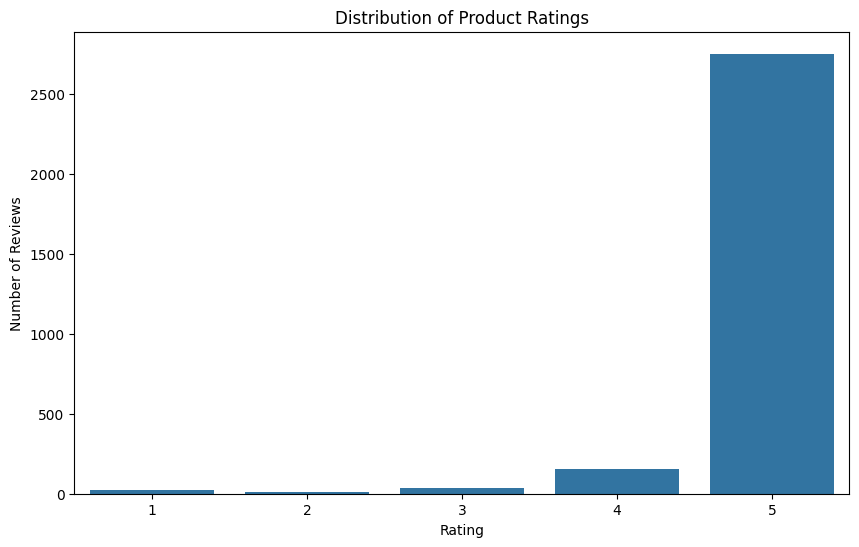

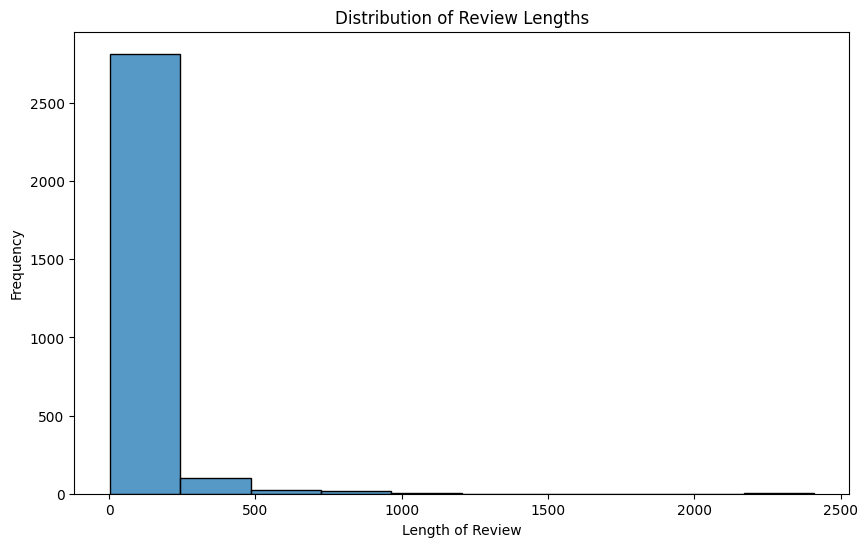

In [7]:
# Part 1 Visualizations

# Visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.countplot(data=data_json, x='overall')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Visualize the distribution of review lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=data_json, x='review_length', bins=10)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

In [8]:
# Part 2: Text basic pre-processing.

# Label data based on the value of "rating of the product"
data_json['sentiment'] = pd.cut(data_json['overall'],
                                bins=[0, 2, 4, 5],
                                labels=['Negative', 'Neutral', 'Positive'],
                                include_lowest=True)

# Choose the appropriate columns for your sentiment analyzer
# Here we choose 'reviewText' for text analysis, 'overall' for the rating, and 'sentiment' for the label.
chosen_columns = ['reviewText', 'overall', 'sentiment']

# Check for outliers in ratings
rating_outliers = data_json['overall'].describe()

# Summarizing the findings
findings_summary = {
    'counts_averages': counts_averages,
    'reviews_per_product': reviews_per_product,
    'reviews_per_user': reviews_per_user,
    'review_lengths_desc': review_lengths_desc,
    'average_review_length': average_review_length,
    'max_review_length': max_review_length,
    'min_review_length': min_review_length,
    'duplicate_reviews': duplicate_reviews,
    'rating_outliers': rating_outliers
}

findings_summary

{'counts_averages': {'total_reviews': 2972,
  'average_rating': 4.885262449528937},
 'reviews_per_product': count    148.000000
 mean      20.081081
 std       19.359300
 min        4.000000
 25%        8.000000
 50%       12.000000
 75%       26.250000
 max       94.000000
 Name: count, dtype: float64,
 'reviews_per_user': count    458.000000
 mean       6.489083
 std        2.710885
 min        5.000000
 25%        5.000000
 50%        6.000000
 75%        7.000000
 max       32.000000
 Name: count, dtype: float64,
 'review_lengths_desc': count    2966.000000
 mean       67.467296
 std       131.120601
 min         2.000000
 25%        12.000000
 50%        29.000000
 75%        72.000000
 max      2409.000000
 Name: review_length, dtype: float64,
 'average_review_length': 67.46729602157788,
 'max_review_length': 2409.0,
 'min_review_length': 2.0,
 'duplicate_reviews': 3,
 'rating_outliers': count    2972.000000
 mean        4.885262
 std         0.484660
 min         1.000000
 25%  

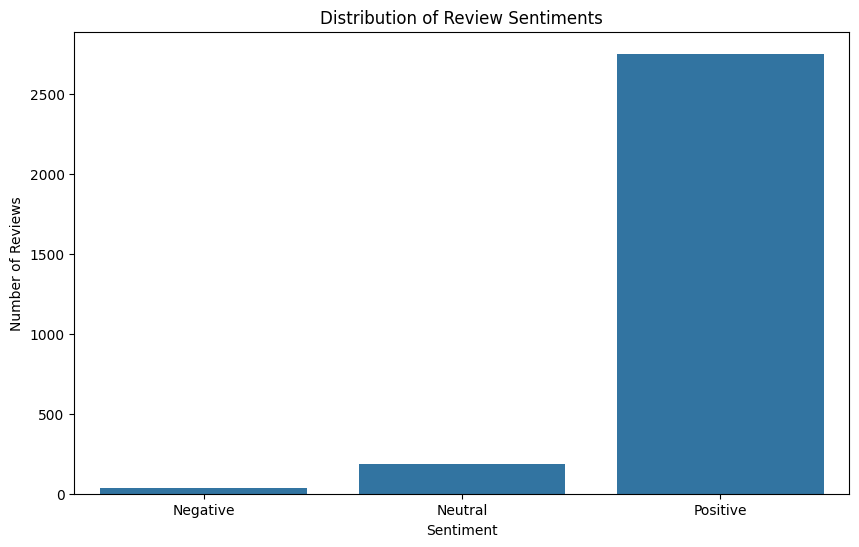

In [9]:
# Part 2 Visualizations

# Visualize the sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data_json, x='sentiment')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()
